In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture

In [30]:
class BayesClassifier():
    def fit(self, X, Y):
        self.k = len(set(Y))
        self.gaus = []
        self.p_y = np.zeros(self.k)
        for i in range(self.k):
            X_k = X[Y == i]
            self.p_y[i] = len(X_k)
            mean_k = np.mean(X_k, axis=0)
            var_k = np.cov(X_k.T)
            moment = {'m':mean_k,'var':var_k}
            self.gaus.append(moment)
        self.p_y = self.p_y/np.sum(self.p_y)
    
    def sample_given_y(self,y):
        moment = self.gaus[y]
        return mvn.rvs(mean=moment['m'],cov=moment['var'])
    
    def sample(self):
        y = np.random.choice(self.k,p_y)
        moment = self.gaus[y]
        return mvn.rvs(mean=moment['m'],cov=moment['var'])

In [31]:
def get_mnist(limit = None):
    dt = pd.read_csv('C:\\Users\\Wei Guo\\Desktop\\data\\digit.csv')
    dt_value = dt.values
    X = dt_value[:,1:]
    Y = dt_value[:,0]
    if limit != None:
        X = X[:int(limit)]
        Y = Y[:int(limit)]
    return X,Y

0
1
2


D:\anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3
4
5
6
7
8
9


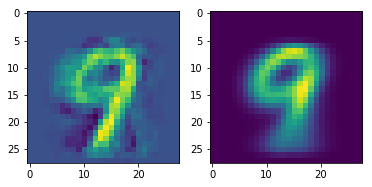

In [37]:
X,Y = get_mnist()
clf = BayesClassifier()
clf.fit(X,Y)

for i in range(clf.k):
    print(i)
    sample_k = clf.sample_given_y(int(i)).reshape(28,28)
    sample_mean = clf.gaus[int(i)]['m'].reshape(28,28)
    
    plt.subplot(1,2,1)
    plt.imshow(sample_k)
    plt.subplot(1,2,2)
    plt.imshow(sample_mean)
    
    



In [41]:
class GmmBayesClassifier():
    def fit(self, X, Y):
        self.k = len(set(Y))
        self.gmm = []
        self.p_y = np.zeros(self.k)
        for i in range(self.k):
            X_k = X[Y == i]
            self.p_y[i] = len(X_k)
            gmm_x = BayesianGaussianMixture(10)
            gmm_x.fit(X_k)
            self.gmm.append(gmm_x)
        self.p_y = self.p_y/np.sum(self.p_y)
    
    def sample_given_y(self,y):
        gmm_x = self.gmm[y]
        sample = gmm_x.sample()
        mean = gmm_x.means_[sample[1]]
        return sample[0].reshape(28,28), mean.reshape[28,28]
    
    def sample(self):
        y = np.random.choice(self.k,p_y)
        return sample_given_y(y)


In [42]:
X,Y = get_mnist()
clf = GmmBayesClassifier()
clf.fit(X,Y)

for i in range(clf.k):
    print(i)
    sample, mean = clf.sample_given_y(i)
    
    plt.subplot(1,2,1)
    plt.imshow(sample_k)
    plt.subplot(1,2,2)
    plt.imshow(sample_mean)

KeyboardInterrupt: 